# Quick Python Refresher

Topics:
- Variables and Data Types
- Control Structures (if, for, while)
- Functions
- Lists, Tuples, and Dictionaries
- Basic class and object concepts (Important for understanding PyTorch modules)
- Importing Libraries and Modules

In [1]:
print("Hello! AI here I come")

Hello! AI here I come


In [2]:
message = "We are going to build neural networks"
print(message)

We are going to build neural networks


## Variables and Data Types

In [ ]:

num_classes = 2 # integer
learning_rate = 0.001 # float

model_name = "Skin Lesion Classifier" # string
is_trained = False # boolean

# way to print variables in a string
print(f"We are training model called: {model_name} with {num_classes} classes at learning rate {learning_rate}")

We are training model called: Skin Lesion Classifier with 2 classes at learning rate 0.001


In [ ]:
class_names = ["benign", "malignant"]  # list. Ordered collection of items
print("Our class names are:", class_names) # other way to print variables

# accessing list items. Its 0 based indexing
first_class = class_names[0]
print("First class is:", first_class)

# adding item to list
class_names.append("unknown")
print("Updated class names:", class_names)

Our class names are: ['benign', 'malignant']
First class is: benign
Updated class names: ['benign', 'malignant', 'unknown']


In [ ]:
# dictionary. Key-value pairs
config = {
    "model_name": "LeNet", # the model which laid foundation for CNNs
    "learning_rate": 0.001,
    "num_classes": num_classes, # can also use variables as values
    "epochs": 10,
    "optimizers": ["SGD", "Adam"] # can also have lists as values
}
# we can also have nested dictionaries

print("Configuration:", config)

# acccessing dictionary items. The keys are used to access values
lr = config["learning_rate"]
print("Learning rate from config:", lr)

# adding new key-value pair. We can just direcltly assign value to a new key
config["batch_size"] = 32
print("Updated configuration:", config)

Configuration: {'model_name': 'LeNet', 'learning_rate': 0.001, 'num_classes': 2, 'epochs': 10, 'optimizers': ['SGD', 'Adam']}
Learning rate from config: 0.001
Updated configuration: {'model_name': 'LeNet', 'learning_rate': 0.001, 'num_classes': 2, 'epochs': 10, 'optimizers': ['SGD', 'Adam'], 'batch_size': 32}


In [7]:
# common error with dictionaries is trying to access a key that doesn't exist
# for example
print(config["momentum"])  # This will raise a KeyError

KeyError: 'momentum'

## Loops

`for` loop: 2 main ways
1. using `range()` just like other languages 
2. iterating over collections like lists and dictionaries

In [ ]:
# using range()
for number in range(5): # prints numbers from 0 to 4. Always goes up to (n-1). No hassle of defining loop variable, condition and increment
    print("Number from range:", number)

Number from range: 0
Number from range: 1
Number from range: 2
Number from range: 3
Number from range: 4


In [9]:
# using list. We can just iterate over the list and get items directly
for name in class_names:
    print("Class name from list:", name)

Class name from list: benign
Class name from list: malignant
Class name from list: unknown


In [ ]:
# we can also iterate over dictionary items. By default, iterating over a dictionary gives us the keys
for item in config:
    print(f"Key: {item}, Value: {config[item]}")

Key: model_name, Value: LeNet
Key: learning_rate, Value: 0.001
Key: num_classes, Value: 2
Key: epochs, Value: 10
Key: optimizers, Value: ['SGD', 'Adam']
Key: batch_size, Value: 32


## Functions

In [12]:
# functions
def train_model(model_name, learning_rate, epochs):
    print(f"Training {model_name} for {epochs} epochs at learning rate {learning_rate}")
    
# with return value
def calculate_accuracy(correct, total):
    accuracy = (correct / total) * 100
    return accuracy

# calling functions
train_model("LeNet", 0.001, 10)
acc = calculate_accuracy(85, 100)
print(f"Model accuracy: {acc}%")

Training LeNet for 10 epochs at learning rate 0.001
Model accuracy: 85.0%


## Classes and Objects

Think of classes as blueprints for creating objects. Objects are instances of classes. Think of object as real-world entities created using the blueprint provided by the class.

In layman terms, a class can be think of as blueprint for house. The object is the actual house built using that blueprint.

Its good idea to understand classes and objects thoroughly as PyTorch heavily uses OOP concepts. For example, when you create a neural network in PyTorch, you typically define a class that inherits from `torch.nn.Module`. Each layer of the network is an object created from classes like `torch.nn.Linear`, `torch.nn.Conv2d`, etc. 

Before next week, please go through basic OOP concepts in Python. Any good online tutorial or resource will do.

In [ ]:
# defining a simple class. 
class NeuralNetwork:
    def __init__(self, name, num_classes):
        self.name = name # these are known as attributes or properties
        self.num_classes = num_classes
        self.is_trained = False
    
    def train(self, epochs):
        print(f"Training {self.name} for {epochs} epochs...")
        self.is_trained = True
    
    def evaluate(self):
        if self.is_trained:
            print(f"{self.name} is evaluated.")
        else:
            print(f"{self.name} is not trained yet.")

In [ ]:
# using the class to create objects
nn = NeuralNetwork("Skin Lesion Classifier", 2) # this creates an object of NeuralNetwork class
nn.train(10) # accessing methods using the object
nn.evaluate()

Training Skin Lesion Classifier for 10 epochs...
Skin Lesion Classifier is evaluated.


# Pytorch Basics and Fundamentals

In [15]:
# first let's import the pytorch library
import torch

In [16]:
# we can check version of any installed library using the __version__ attribute
print("PyTorch version:", torch.__version__)

PyTorch version: 2.8.0


## Tensors

In [ ]:
# 1D tensor
tensor_1d = torch.tensor([1, 2, 3, 4, 5])
print("1D Tensor (Vector):")
print(tensor_1d)

1D Tensor (Vector:)
tensor([1, 2, 3, 4, 5])


In [ ]:
# 2D tensor
tensor_2d = torch.tensor([
    [1,2,3],
    [4,5,6],
])
print("2D Tensor (Matrix):")
print(tensor_2d)

2D Tensor (Matrix):
tensor([[1, 2, 3],
        [4, 5, 6]])


In [21]:
# tensors have shapes. Shape is like the dimensions of the tensor
print("Shape of 1D tensor:", tensor_1d.shape)
print("Shape of 2D tensor:", tensor_2d.shape)

Shape of 1D tensor: torch.Size([5])
Shape of 2D tensor: torch.Size([2, 3])


In [31]:
# operations on tensors
tensor_sum = tensor_1d + 10 # adding scalar to tensor
print("Tensor before adding 10:", tensor_1d)
print("Tensor after adding 10:", tensor_sum)

# multiplying two tensors
tensor_mult = tensor_1d * 2
print("Tensor before multiplying by 2:", tensor_1d)
print("Tensor after multiplying by 2:", tensor_mult)


Tensor before adding 10: tensor([1, 2, 3, 4, 5])
Tensor after adding 10: tensor([11, 12, 13, 14, 15])
Tensor before multiplying by 2: tensor([1, 2, 3, 4, 5])
Tensor after multiplying by 2: tensor([ 2,  4,  6,  8, 10])


## Device Management 

Another important concept in pytorch is device management. Tensors can be stored and processed on different devices, such as CPU or GPU. Using a GPU can significantly speed up computations, especially for large-scale neural networks.

In [ ]:
# we can check if a GPU is available and check the device our tensor is on and move it if needed
if torch.cuda.is_available():
    device = torch.device("cuda")  # GPU
    print("GPU is available. Using GPU.")
else:
    device = torch.device("cpu")   # CPU
    print("GPU not available. Using CPU.")
    
# checking device of tensor
print("Device of 1D tensor before moving:", tensor_1d.device)
# moving tensor to the selected device
tensor_1d = tensor_1d.to(device)
print("Device of 1D tensor after moving:", tensor_1d.device)

GPU not available. Using CPU.
Device of 1D tensor before moving: cpu
Device of 1D tensor after moving: cpu


This is the most pain in ahh part about pytorch. You have to manually manage devices. For computation to be performed on tensors, all the tensors involved must be on the same device. If they are not, you will get runtime errors. So always ensure that tensors are on the same device before performing operations on them.

In [23]:
# checking data type of tensor
print("Data type of 1D tensor:", tensor_1d.dtype)

# float tensor
float_tensor = torch.tensor([1.0, 2.0, 3.0])
print("Float Tensor:", float_tensor)
print("Data type of Float Tensor:", float_tensor.dtype)

Data type of 1D tensor: torch.int64
Float Tensor: tensor([1., 2., 3.])
Data type of Float Tensor: torch.float32


## Random tensor creation

We often need to create tensors of specific shape filled with random values or zeros. PyTorch provides convenient functions for this.

To make sure the random tensors are reproducible, we can set a random seed using `torch.Generator().manual_seed()`. This ensures that every time we run the code, we get the same random values. The seed value can be any integer; using the same seed will always produce the same random tensor. The choice of seed value 42 is historically popular in programming and computer science as a reference to "The Hitchhiker's Guide to the Galaxy" by Douglas Adams, where 42 is humorously presented as the "answer to the ultimate question of life, the universe, and everything.".

This is especially useful for debugging and testing, as it allows us to have consistent results across different runs of the code.

Working of random seed? Its more of theoretical concept. Good resource if you want to deep dive look at this [stackoverflow discussion](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do). 

In [ ]:

random_tensor = torch.rand((3, 4), generator=torch.Generator().manual_seed(42))  # 3x4 tensor with random values. It will have values between 0 and 1. For integer random tensors, we can use torch.randint()
zero_tensor = torch.zeros((2, 5))   # 2x5 tensor filled with zeros
one_tensor = torch.ones((2,3))      # 2x3 tensor filled with ones

print("Random Tensor (3x4):")
print(random_tensor)

print("Zero Tensor (2x5):")
print(zero_tensor)

print("One Tensor (2x3):")
print(one_tensor)

Random Tensor (3x4):
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
Zero Tensor (2x5):
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
One Tensor (2x3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])


## Automatic Differentiation and Computational Graphs 

The heart of PyTorch's deep learning capabilities lies in its automatic differentiation engine, known as Autograd. Autograd allows PyTorch to automatically compute gradients for tensor operations, which is essential for training neural networks using backpropagation.

In [27]:
# create a tensor and tell pytorch to track operations on it for automatic differentiation
x = torch.tensor(2.0, requires_grad=True)

# define a simple function
y = x**2 + 3*x + 5

print(f"x={x}")
print(f"y=x**2 + 3*x + 5={y}")

x=2.0
y=x**2 + 3*x + 5=15.0


In [28]:
# now magic : calculate the gradient of y with respect to x
y.backward()  # this computes the gradient

print(f"Gradient of y with respect to x (dy/dx) at x={x.item()} is {x.grad.item()}")

Gradient of y with respect to x (dy/dx) at x=2.0 is 7.0


### Visualizing the computational graph

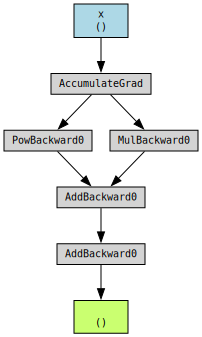

In [40]:
from torchviz import make_dot

x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 5

# visualize the graph
make_dot(y, params={"x": x})

### More realistic example of autograd

In [54]:
# 1. The data: single input and single output
x_input = torch.tensor([3.0])
y_ground_truth = torch.tensor([7.0])

# 2. Model parameters: weight and bias. Our knobs that model will learn
# we start with random initilized values. Well there are better ways to initialize these values such as Xavier initialization or He initialization but for simplicity we will use fixed random values here.
w = torch.tensor([1.0], requires_grad=True)  # weight. Can also randomly initialize
b = torch.tensor([1.0], requires_grad=True)  # bias
print(f"Initial parameters are: w={w.item()}, b={b.item()}")

# 3. Our single training step
# guess the output, calculate loss, compute gradients, update parameters
y_predicted = w * x_input + b  # linear model
print(f"Our model's prediction: {y_predicted.item()}")
loss = (y_predicted - y_ground_truth)**2  # mean squared error loss
print(f"The loss (how wrong we are): {loss.item()}")

# compute gradients
loss.backward()

print("Autograd results:")
print(f"Gradient of loss with respect to w (dl/dw): {w.grad.item()}")
print(f"Gradient of loss with respect to b (dl/db): {b.grad.item()}")


Initial parameters are: w=1.0, b=1.0
Our model's prediction: 4.0
The loss (how wrong we are): 9.0
Autograd results:
Gradient of loss with respect to w (dl/dw): -18.0
Gradient of loss with respect to b (dl/db): -6.0


So what do these gradient numbers mean?
    
1. `w.grad` is -18.00. This is a large negative number. It tells us two things:
   - The loss is very sensitive to changes in `w`.
   - Since the gradient is negative, increasing `w` will decrease the loss. This is our 'compass' telling us the downhill direction for `w` is 'up'! This makes perfect sense, our `w` of 1 was too small to get to the target of 7.
2. `b.grad` is -6.00. This is also negative.
   - It tells us that to go 'downhill' on the loss, we should also increase `b`. Again, this makes sense.

The next step, which an optimizer would do for us, is to take these gradients and update the weights: `w = w - learning_rate * w.grad` and `b = b - learning_rate * b.grad`. This single example shows the entire information flow required for a model to learn from a single mistake."

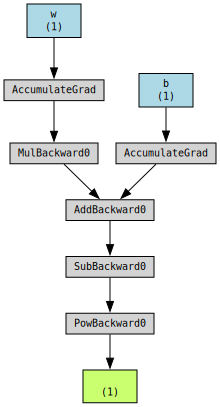

In [ ]:
# plotting computation graph using torchviz
make_dot(loss, params={"w": w, "b": b})

In [56]:
# update the parameters using gradient descent and run a single training step again
learning_rate = 0.01
with torch.no_grad():  # we don't want to track these operations for autograd
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    # zero the gradients after updating. 
    # !! THIS IS VERY IMPORTANT TO AVOID ACCUMULATING GRADIENTS. 
    # If we don't zero the gradients, they will keep adding up in subsequent backward() calls
    w.grad.zero_()
    b.grad.zero_()
    
# run another training step
y_predicted = w * x_input + b  # linear model
print(f"After one parameter update, our model's prediction: {y_predicted.item():.4f}")
loss = (y_predicted - y_ground_truth)**2  # mean squared error loss
print(f"After one parameter update, the loss (how wrong we are): {loss.item():.4f}")



After one parameter update, our model's prediction: 4.6000
After one parameter update, the loss (how wrong we are): 5.7600
